<a href="https://colab.research.google.com/github/suhail-3206/Sentithon-Entity3/blob/main/sentithon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot") 
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#read the csv file
df1 = pd.read_csv('tweets.csv')
 #show the first 5 rows of data
df=df1.drop(['Unnamed: 0','User'], axis=1)
df.head()

,Tweet
0,"1,20,196 Post offices in India are providing C..."
1,RT @_DigitalIndia: 📽️ Under an MoU signed betw...
2,"RT @_DigitalIndia: 1,20,196 Post offices in In..."
3,#fashion #startup Virgio Fashion has raised $1...
4,Experiencing #DigitalIndia! \n\nAt Shilpgram c...


In [ ]:
#raw data before preprocessing
print(df['Tweet'].iloc[0],'\n')
print(df['Tweet'].iloc[1],'\n')
print(df['Tweet'].iloc[2],'\n')
print(df['Tweet'].iloc[3],'\n')
print(df['Tweet'].iloc[4],'\n')

1,20,196 Post offices in India are providing Common Service Centre (CSC) Services. @IndiaPostOffice @CSCegov_ #DigitalIndia https://t.co/2VHUfi9WvZ 

RT @_DigitalIndia: 📽️ Under an MoU signed between @CSCegov_ and October Cinemas, #CSC plans to open 10000 cinema halls by end of 2024 which… 

RT @_DigitalIndia: 1,20,196 Post offices in India are providing Common Service Centre (CSC) Services. @IndiaPostOffice @CSCegov_ #DigitalIn… 

#fashion #startup Virgio Fashion has raised $10 million in an extended Series A #funding led by a Netherlands-based tech investor Prosus Ventures. #India #StartupIndia #DigitalIndia #VentureCapital 

Experiencing #DigitalIndia! 

At Shilpgram crafts village, #G20 delegates used the UPI, India’s homegrown and massively successful digital payments interface to make a transaction and buy Rajasthani angrakha! #G20India 
#NCCT  #सहकारसेसमृद्धि #MinOfCooperatn #CooperativeSocietes https://t.co/ajbkNNOomP 



In [ ]:
#clean the text

#create a function to clean the tweets
def cleantxt(text):
  text = text.lower()
  text = re.sub(r'https\S+|www\S+https\S+','',text,flags=re.MULTILINE) # removes the hyper links
  text = re.sub(r'\@w+|\#','',text)#removed @mentions
  text = re.sub(r'[^\w\s]','',text)
  text = re.sub(r'rt[\s]+','',text)#removing RT
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)


In [ ]:
df.Tweet = df['Tweet'].apply(cleantxt)

In [ ]:
# removing duplicate data
df=df.drop_duplicates('Tweet')

In [ ]:
# performing Stemming we can even perform lemmatization
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [ ]:
df['Tweet'] = df['Tweet'].apply(lambda x: stemming(x))

In [ ]:
df.head()

,Tweet
0,120196 post offices india providing common ser...
1,_digitalindia mou signed cscegov_ october cine...
2,_digitalindia 120196 post offices india provid...
3,fashion startup virgio fashion raised 10 milli...
4,experiencing digitalindia shilpgram crafts vil...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 4996
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1144 non-null   object
dtypes: object(1)
memory usage: 17.9+ KB


In [ ]:
# create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

#show the new data
df

,Tweet,Subjectivity,Polarity
0,120196 post offices india providing common ser...,0.500000,-0.300000
1,_digitalindia mou signed cscegov_ october cine...,0.500000,0.000000
2,_digitalindia 120196 post offices india provid...,0.500000,-0.300000
3,fashion startup virgio fashion raised 10 milli...,0.000000,0.000000
4,experiencing digitalindia shilpgram crafts vil...,0.475000,0.375000
...,...,...,...
4971,cscegov_ workshop emerging opportunities vles ...,0.500000,0.136364
4975,bhart09 indian technology amp industry writing...,0.000000,0.000000
4979,step home spend hours queue paof global transf...,0.000000,0.000000
4993,flaxeninfosoft twitter presently hot topic eve...,0.603571,0.125000


In [ ]:
df.head()

,Tweet,Subjectivity,Polarity
0,120196 post offices india providing common ser...,0.500,-0.300
1,_digitalindia mou signed cscegov_ october cine...,0.500,0.000
2,_digitalindia 120196 post offices india provid...,0.500,-0.300
3,fashion startup virgio fashion raised 10 milli...,0.000,0.000
4,experiencing digitalindia shilpgram crafts vil...,0.475,0.375


In [ ]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if(score<0):
    return "Negative"
  elif(score==1):
    return "Neutral"
  else:
    return "Positive"
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show the dataframe
df.head()

,Tweet,Subjectivity,Polarity,Analysis
0,120196 post offices india providing common ser...,0.500,-0.300,Negative
1,_digitalindia mou signed cscegov_ october cine...,0.500,0.000,Positive
2,_digitalindia 120196 post offices india provid...,0.500,-0.300,Negative
3,fashion startup virgio fashion raised 10 milli...,0.000,0.000,Positive
4,experiencing digitalindia shilpgram crafts vil...,0.475,0.375,Positive


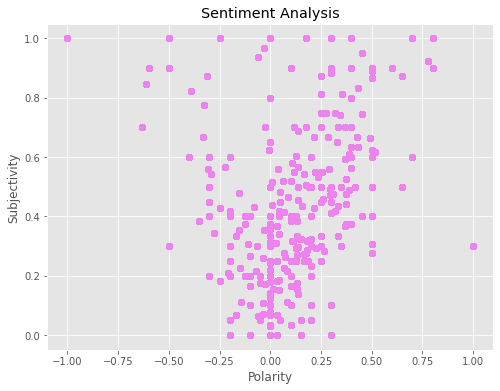

In [ ]:
# plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'], df['Subjectivity'], color='violet')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

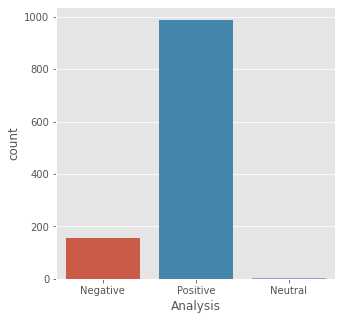

In [ ]:
#exploring data using bar graph
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Analysis',data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

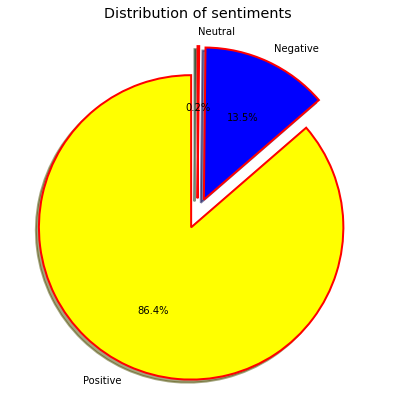

In [ ]:
#exploring data using pie chart
fig = plt.figure(figsize=(7,7))
colors = ('yellow','blue','green')
wp={'linewidth':2,'edgecolor':"red"}
tags=df['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, wedgeprops= wp, explode = explode, label='')
plt.title("Distribution of sentiments")

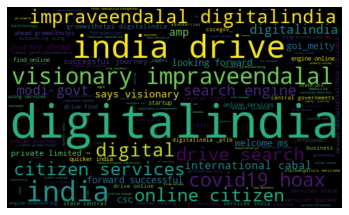

In [ ]:
#plot the Word Cloud
allWords = ' '.join([twts for twts in df['Tweet']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#lets see top 5 tweets for each sentiment
pos_tweets = df[df.Analysis == 'Positive']
pos_tweets = pos_tweets.sort_values(['Polarity'],ascending=False)
pos_tweets.head()

,Tweet,Subjectivity,Polarity,Analysis
2294,happy announce onwards csc vles entitled axis ...,1.0,0.8,Positive
2275,digiindieexpo digiindieexpo 2023 welcome artoo...,0.9,0.8,Positive
3933,digiindieexpo 2023 welcome artoonsolutions val...,0.9,0.8,Positive
1045,cscfinancial_ happy announce onwards csc vles ...,1.0,0.8,Positive
594,proud paof national conclave held 30th novthan...,1.0,0.8,Positive


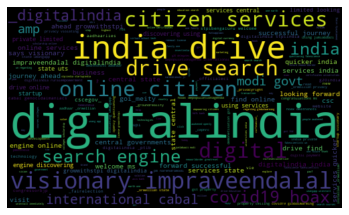

In [ ]:
# word cloud for positive tweets

allWords = ' '.join([twts for twts in pos_tweets['Tweet']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#top 5 tweets in negative sentiment
neg_tweets = df[df.Analysis == 'Negative']
neg_tweets = neg_tweets.sort_values(['Polarity'])
neg_tweets.head()

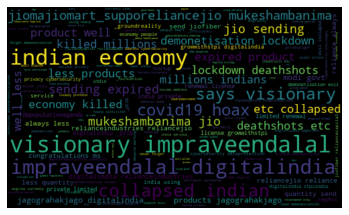

In [ ]:
# word cloud for negative tweets

allWords = ' '.join([twts for twts in neg_tweets['Tweet']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#lets perforn countvectorization and then lets build a bigram model
vect = CountVectorizer(ngram_range=(1,2)).fit(df['Tweet'])

In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("first 20 features:\n {}".format(feature_names[:20]))

Number of features: 12588

first 20 features:
 ['07122022', '07122022 goi_meity', '10', '10 growing', '10 million', '100', '100 smsday', '10000', '10000 cinema', '10000 services', '100k', '100k launch', '104', '104 cr', '10min', '10min pass', '10times', '10times day', '10x', '10x five']


In [ ]:
x=df['Tweet']
y=df['Analysis']
x=vect.transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print('size of x_train:',(x_train.shape))
print('size of y_train:',(y_train.shape))
print('size of x_test:',(x_test.shape))
print('size of y_test:',(x_test.shape))

size of x_train: (915, 12608)
size of y_train: (915,)
size of x_test: (229, 12608)
size of y_test: (229, 12608)


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 96.07%


In [ ]:
#lets print the confusion matrix
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[ 24   0   6]
 [  0   0   1]
 [  2   0 196]]


              precision    recall  f1-score   support

    Negative       0.92      0.80      0.86        30
     Neutral       0.00      0.00      0.00         1
    Positive       0.97      0.99      0.98       198

    accuracy                           0.96       229
   macro avg       0.63      0.60      0.61       229
weighted avg       0.96      0.96      0.96       229



In [ ]:
import warnings
warnings.filterwarnings('ignore')

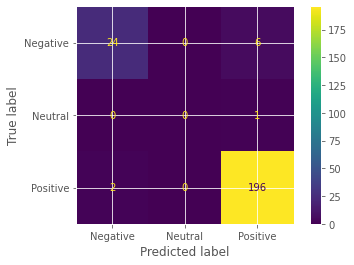

In [ ]:
#creating a heatmap
cm = confusion_matrix(y_test,logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
#how accuracy changes by applying hyperperameter tunning
#here we are using gridsearchcv to perform hyperperameter tunning
#we are performing hyperparameter on c parameter
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 1}


In [ ]:
y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred,y_test)
print("test accuracy: {:.2f}%".format(logreg_acc*100))


test accuracy: 96.07%


In [ ]:
#lets print the confusion matrix
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[ 24   0   6]
 [  0   0   1]
 [  2   0 196]]


              precision    recall  f1-score   support

    Negative       0.92      0.80      0.86        30
     Neutral       0.00      0.00      0.00         1
    Positive       0.97      0.99      0.98       198

    accuracy                           0.96       229
   macro avg       0.63      0.60      0.61       229
weighted avg       0.96      0.96      0.96       229



In [ ]:
from sklearn.svm import SVC

In [ ]:
model2 = SVC()
model2.fit(x_train,y_train)
logreg.fit(x_train,y_train)
model2_pred = model2.predict(x_test)
model2_acc = accuracy_score(model2_pred,y_test)
print("Test accuracy: {:.2f}%".format(model2_acc*100))

NameError: ignored